## **EDA | Разведочный анализ данных**

In [26]:
import pandas as pd
from datetime import datetime
from dateutil.parser import parse
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import graphviz 
from sklearn.ensemble import VotingClassifier
import os


In [27]:
path = ''
samples_path = os.path.join(path, "data", "beeline_antispam_hakaton_id_samples.csv")
samples = pd.read_csv(samples_path)
samples.head()

,id,target,split
0,196535,NaN,test
1,63075900,2.0,train
2,35233935,2.0,train
3,23557360,4.0,train
4,78926486,NaN,test


In [28]:
data_path = os.path.join(path, 'data', 'time_key=2021-11-01.csv')
data = pd.read_csv(data_path)
data.head()            

,id_a,id_b,start_time_local,time_zone,duration,forward,zero_call_flg,source_b,source_f,num_b_length,time_key
0,67596082,43588153,18:43:03,3,0,0,3,0,1,10,2021-11-01
1,4024969,67656553,11:43:20,4,206,0,5,1,0,10,2021-11-01
2,43166780,31861625,10:32:36,0,5,0,0,0,1,10,2021-11-01
3,51817902,41201237,13:45:02,3,0,0,0,0,1,10,2021-11-01
4,41812796,4932754,13:53:12,0,0,0,5,0,1,10,2021-11-01



Посмотрим на пропущенные значения и уберем их при необходимости

In [29]:
data.dropna(inplace=True)

In [30]:
samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46235 entries, 0 to 46234
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      46235 non-null  int64  
 1   target  36942 non-null  float64
 2   split   46235 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


In [31]:
data = pd.read_csv('./data/time_key=2021-11-01.csv')
data.head()                  

,id_a,id_b,start_time_local,time_zone,duration,forward,zero_call_flg,source_b,source_f,num_b_length,time_key
0,67596082,43588153,18:43:03,3,0,0,3,0,1,10,2021-11-01
1,4024969,67656553,11:43:20,4,206,0,5,1,0,10,2021-11-01
2,43166780,31861625,10:32:36,0,5,0,0,0,1,10,2021-11-01
3,51817902,41201237,13:45:02,3,0,0,0,0,1,10,2021-11-01
4,41812796,4932754,13:53:12,0,0,0,5,0,1,10,2021-11-01


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3987696 entries, 0 to 3987695
Data columns (total 11 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   id_a              int64 
 1   id_b              int64 
 2   start_time_local  object
 3   time_zone         int64 
 4   duration          int64 
 5   forward           int64 
 6   zero_call_flg     int64 
 7   source_b          int64 
 8   source_f          int64 
 9   num_b_length      int64 
 10  time_key          object
dtypes: int64(9), object(2)
memory usage: 334.7+ MB


Выделим фичи из датасета и поделим их на числовые и категориальные.

In [33]:
num_cols = [
    'start_time_local',
    'duration',
    'num_b_length',
    'time_key'
]

cat_cols = [
    'id_a',
    'id_b',
    'time_zone',
    'forward',
    'zero_call_flg',
    'source_b',
    'source_f',
]

cols = num_cols + cat_cols
data = data[cols]


## Диаграмма nan-ов


start_time_local    0.0
duration            0.0
num_b_length        0.0
time_key            0.0
id_a                0.0
id_b                0.0
time_zone           0.0
forward             0.0
zero_call_flg       0.0
source_b            0.0
source_f            0.0
dtype: float64


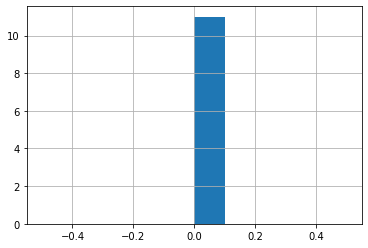

In [34]:
print(data.isna().mean())
fig = data.isna().mean().hist().get_figure()

## Распределение звонков по локальному времени


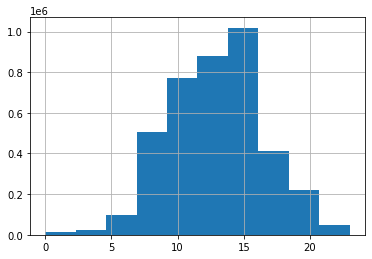

In [35]:
hours_distributions = data['start_time_local'].str.slice(0, 2).astype(int)
fig = hours_distributions.hist().get_figure()

## Распределение звонков по UTC:

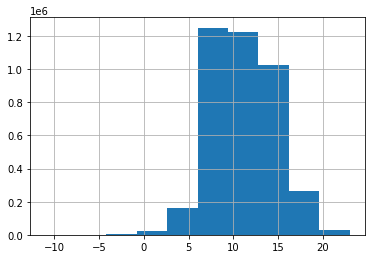

In [36]:
hours_distributions_UTS = hours_distributions - data['time_zone'].astype(int)
fig = hours_distributions_UTS.hist().get_figure()

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
    <font size="4", color="DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br><br>
    <font size="3", color="black">
        Опять же такие исследования нужно делать в EDA и с графиками
    </font>
<div>

**Посмотрим на распределение фичей**

In [37]:
for col in cat_cols:
    print(f"{col} DISTRIBUTION")
    print(data[col].value_counts())
    # TODO: спросить, как визуализировать эти распределения
    # plt.pie(data[cat_cols].value_counts())
    # plt.show() 
    print()
    print()


id_a DISTRIBUTION
6325350     796581
1741727     543328
51817902    280753
52273536    137530
41812796    126601
             ...  
60188729         1
9767824          1
34529479         1
53304427         1
83290750         1
Name: id_a, Length: 16350, dtype: int64


id_b DISTRIBUTION
5137773     64385
67511626     6162
7055569      5063
70502169     4756
3969649      3220
            ...  
21345557        1
24010827        1
41561212        1
48440682        1
25108797        1
Name: id_b, Length: 2405512, dtype: int64


time_zone DISTRIBUTION
 3     2364049
 0     1382857
 4       97344
 2       76354
 7       48637
 5        9136
 1        4690
 8        1615
-1        1386
 10        877
 6         428
 11        184
 9         119
 12         20
Name: time_zone, dtype: int64


forward DISTRIBUTION
0    3620885
1     366811
Name: forward, dtype: int64


zero_call_flg DISTRIBUTION
0    2267314
5    1404606
2     102543
1      94999
3      86638
4      31596
Name: zero_call_flg, dty

**Визуализируем распределение категориальных фичей**

Распределение часовых зон:


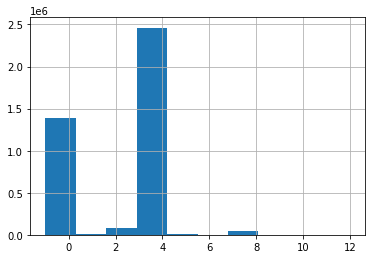

In [38]:

h = data['time_zone'].hist()
fig = h.get_figure()

Распределение категории звонка с нулевой длительностью:

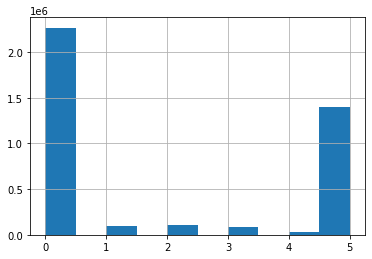

In [39]:
h = data['zero_call_flg'].hist()
fig = h.get_figure()

**Столбцы в таблице целевых переменных**

In [40]:
target_cols = ['id','target','split']
for col in target_cols:
    print(f"{col} DISTRIBUTION")
    print(samples[col].value_counts())

id DISTRIBUTION
196535      1
40982206    1
25798719    1
19050882    1
17647619    1
           ..
23760948    1
78393782    1
75174874    1
23157851    1
12483388    1
Name: id, Length: 46235, dtype: int64
target DISTRIBUTION
0.0    16344
4.0     9966
2.0     6697
3.0     2012
1.0     1923
Name: target, dtype: int64
split DISTRIBUTION
train    36942
test      9293
Name: split, dtype: int64


**Визуализация распределения целевых переменных**

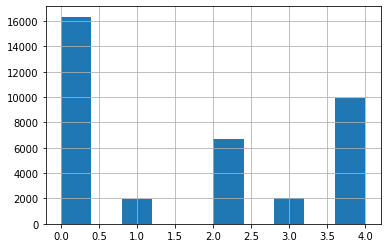

In [41]:
h = samples['target'].hist()
fig = h.get_figure()